In [ ]:
!pip install zipfile36

In [ ]:
import pandas as pd
import zipfile

# Load the dataset
def load_data(file_path):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Get the first JSON file in the archive
        json_file = [f for f in zip_ref.namelist() if f.endswith('.json')][0]
        # Extract the JSON file to memory and load it as a DataFrame
        with zip_ref.open(json_file) as f:
            df = pd.read_json(f)
    return df


# Preprocess the dataset
def preprocess_data(df):
    df['context'] = df['data'].apply(lambda x: x['paragraphs'][0]['context'])
    df['question'] = df['data'].apply(lambda x: x['paragraphs'][0]['qas'][0]['question'])
    df['answer'] = df['data'].apply(lambda x: x['paragraphs'][0]['qas'][0]['answers'][0]['text'])
    return df[['context', 'question', 'answer']]

# Main function for loading and preprocessing
if __name__ == '__main__':
    file_path = '/content/drive/MyDrive/archive (22).zip'
    df = load_data(file_path)
    df = preprocess_data(df)
    print(df.head())

                                             context  \
0  Super Bowl 50 was an American football game to...   
1  One of the most famous people born in Warsaw w...   
2  The Normans (Norman: Nourmands; French: Norman...   
3  Nikola Tesla (Serbian Cyrillic: Никола Тесла; ...   
4  Computational complexity theory is a branch of...   

                                            question  \
0  Which NFL team represented the AFC at Super Bo...   
1  What was Maria Curie the first female recipien...   
2               In what country is Normandy located?   
3               In what year was Nikola Tesla born?    
4  What branch of theoretical computer science de...   

                            answer  
0                   Denver Broncos  
1                      Nobel Prize  
2                           France  
3                             1856  
4  Computational complexity theory  


In [ ]:
import pandas as pd
import zipfile

def extract_topics():
    # Load the dataset
    # Instead of directly reading the zip file, extract the relevant JSON file first.
    with zipfile.ZipFile('/content/drive/MyDrive/archive (22).zip', 'r') as zip_ref:
        # Assuming you want to use 'train-v1.1.json', change this if needed.
        json_file = 'train-v1.1.json'
        with zip_ref.open(json_file) as f:
            data = pd.read_json(f)
    topics = set()

    # Extract unique topic names from the dataset
    for item in data['data']:
        for paragraph in item['paragraphs']:
            topics.add(item['title'])  # Assuming 'title' represents the topic

    return topics

if __name__ == "__main__":
    topics = extract_topics()
    print("Available topics in the dataset:")
    for topic in topics:
        print(f"- {topic}")

Available topics in the dataset:
- Roman_Republic
- Prime_minister
- Daylight_saving_time
- Xbox_360
- Post-punk
- Database
- Beer
- ASCII
- Southeast_Asia
- Time
- Software_testing
- Classical_music
- Sumer
- Race_(human_categorization)
- Computer
- Himachal_Pradesh
- Hindu_philosophy
- Boston
- Cubism
- Pope_John_XXIII
- Seattle
- Alsace
- Ashkenazi_Jews
- Idealism
- Edmund_Burke
- Franco-Prussian_War
- Pope_Paul_VI
- Republic_of_the_Congo
- Montevideo
- Alexander_Graham_Bell
- CBC_Television
- MP3
- States_of_Germany
- Mammal
- 51st_state
- Hokkien
- Digestion
- Cyprus
- Southampton
- Russian_Soviet_Federative_Socialist_Republic
- British_Isles
- Digimon
- Anthropology
- Web_browser
- Green
- Mexico_City
- Slavs
- Communications_in_Somalia
- Insect
- Child_labour
- Orthodox_Judaism
- The_Sun_(United_Kingdom)
- Red
- Presbyterianism
- Elevator
- Punjab,_Pakistan
- Cardinal_(Catholicism)
- 2008_Sichuan_earthquake
- Samurai
- Association_football
- Identity_(social_science)
- Aircraft_

In [ ]:
import pandas as pd
import random
import zipfile

def generate_incorrect_options(data, correct_answer, topic):
    """Generate plausible incorrect options based on the dataset and the topic context."""
    incorrect_options = set()

    # Collect all possible answers from the dataset that are related to the topic
    all_answers = []
    for item in data['data']:
        for paragraph in item['paragraphs']:
            for qa in paragraph['qas']:
                if qa['answers']:
                    for ans in qa['answers']:
                        if topic.lower() in ans['text'].lower():  # Check if the answer is related to the topic
                            all_answers.append(ans['text'])

    # Remove the correct answer from the list of possible incorrect options
    all_answers = list(set(all_answers))  # Remove duplicates
    if correct_answer in all_answers:
        all_answers.remove(correct_answer)

    # Randomly select three unique incorrect options
    while len(incorrect_options) < 3 and all_answers:
        incorrect_option = random.choice(all_answers)
        incorrect_options.add(incorrect_option)

    return list(incorrect_options)

def generate_fill_in_the_blank(question, correct_answer):
    """Generate a fill-in-the-blank question with a placeholder."""
    return question.replace(correct_answer, "______")

def generate_true_false_question(question, correct_answer):
    """Generate a true/false question."""
    return f"True or False: {question} (Answer: {'True' if correct_answer else 'False'})"

def generate_quiz_from_dataset(topic, num_questions, question_type):
    # Extract and load the dataset from the zip file
    with zipfile.ZipFile('/content/drive/MyDrive/archive (22).zip', 'r') as zip_ref:
        # Use the 'train-v1.1.json' file within the zip archive
        json_file = 'train-v1.1.json'
        with zip_ref.open(json_file) as f:
            data = pd.read_json(f)

    questions = []

    # Filter questions based on the topic
    for item in data['data']:
        for paragraph in item['paragraphs']:
            for qa in paragraph['qas']:
                question = qa['question']
                answer = qa['answers'][0]['text'] if qa['answers'] else "No answer available"
                if topic.lower() in question.lower():
                    questions.append((question, answer))

    if not questions:
        print("No questions found for this topic.")
        return

    # Shuffle questions and select the specified number
    random.shuffle(questions)
    selected_questions = questions[:num_questions]

    for index, (question, answer) in enumerate(selected_questions, start=1):
        if question_type == 'mcq':
            print(f"Question {index}: {question}")

            # Generate plausible incorrect options based on the dataset and topic context
            incorrect_options = generate_incorrect_options(data, answer, topic)

            # Combine correct answer with incorrect options
            options = [answer] + incorrect_options
            random.shuffle(options)

            # Format options as A, B, C, D
            for i, option in enumerate(options):
                print(f"{chr(65 + i)}) {option}")

            # Find the correct answer's position
            correct_index = options.index(answer)
            print(f"Answer: {chr(65 + correct_index)}) {answer}")
            print("=" * 50)

        elif question_type == 'fill-in-the-blank':
            fill_in_question = generate_fill_in_the_blank(question, answer)
            print(f"Fill in the blank {index}: {fill_in_question}")
            print(f"Answer: {answer}")
            print("=" * 50)

        elif question_type == 'true/false':
            true_false_question = generate_true_false_question(question, answer)
            print(f"True/False Question {index}: {true_false_question}")
            print("=" * 50)

if __name__ == "__main__":
    topic = input("Enter the topic for the quiz: ")
    num_questions = int(input("Enter the number of questions to generate: "))
    question_type = input("Enter question type (mcq/fill-in-the-blank/true/false): ").lower()
    generate_quiz_from_dataset(topic, num_questions, question_type)


Enter the topic for the quiz: Database
Enter the number of questions to generate: 5
Enter question type (mcq/fill-in-the-blank/true/false): mcq
Question 1: What was the name of the database product created by IBM?
A) SQL/DS, and, later, Database 2 (DB2)
B) not be placed in the database
C) unauthorized users from viewing or updating the database
D) Database Task Group
Answer: A) SQL/DS, and, later, Database 2 (DB2)
Question 2: The IANA database works by connecting names to what information about the location?
A) database is found corrupted
B) managing personal databases
C) database related application
D) historical and predicted clock shifts
Answer: D) historical and predicted clock shifts
Question 3: How are today's database systems run?
A) structured document-oriented database
B) general-purpose hardware
C) database technology
D) SQL/DS, and, later, Database 2 (DB2)
Answer: B) general-purpose hardware
Question 4: What database language is the most prominent?
A) unauthorized users from

                                                data  version
0  {'title': 'University_of_Notre_Dame', 'paragra...      1.1
1  {'title': 'Beyoncé', 'paragraphs': [{'context'...      1.1
2  {'title': 'Montana', 'paragraphs': [{'context'...      1.1
3  {'title': 'Genocide', 'paragraphs': [{'context...      1.1
4  {'title': 'Antibiotics', 'paragraphs': [{'cont...      1.1


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


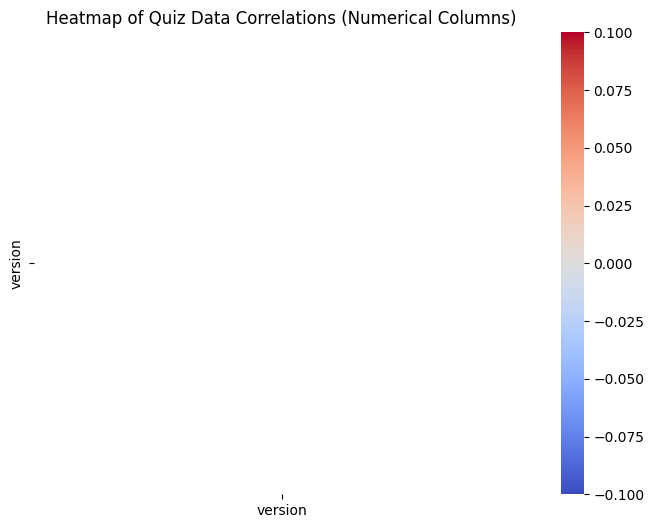

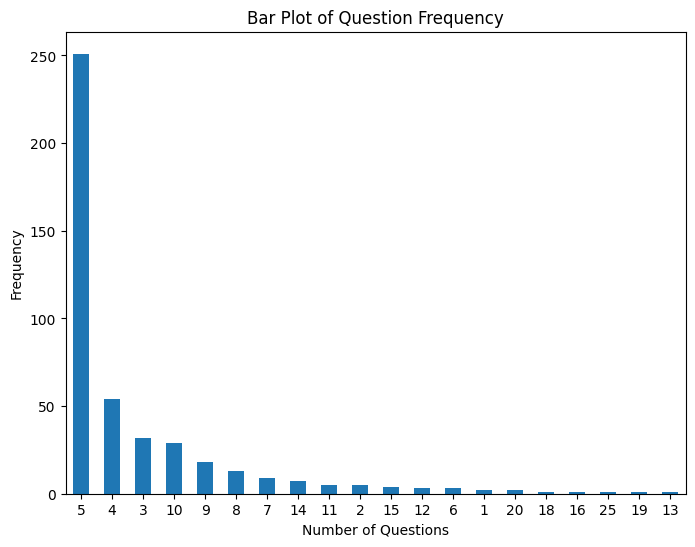

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

# Load dataset from a URL (replace with your link)
dataset_url = '/content/drive/MyDrive/archive (22).zip'

json_file = 'train-v1.1.json'

# Extract the JSON file from the zip archive
with zipfile.ZipFile(dataset_url, 'r') as zip_ref:
    with zip_ref.open(json_file) as f:
        df = pd.read_json(f)

# Preview the dataset
print(df.head())


numerical_df = df[['version']].copy()
if not numerical_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap of Quiz Data Correlations (Numerical Columns)')
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")


plt.figure(figsize=(8, 6))
question_counts = df['data'].apply(lambda x: len(x['paragraphs'][0]['qas'])).value_counts()
question_counts.plot(kind='bar')
plt.title('Bar Plot of Question Frequency')
plt.xlabel('Number of Questions')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()